## Experiment reporter
* Tool for analysing the experiment results, stored in loggers


In [ ]:
import pickle
from detector.reporter import Reporter
# Action: Modify based on local filesystem
with open('example-retrained.pkl', 'rb') as inp:
    logger_retrained = pickle.load(inp)
with open('example.pkl', 'rb') as inp:
    logger_reference = pickle.load(inp)

reporter_retrained = Reporter(logger_retrained, ["Retraining Model"], chunk_length=7)
reporter_reference = Reporter(logger_reference, ["Reference Model"], chunk_length=7)

### Global overview of the experiment results
Show how the experiments were defined and get the broad overview of experiment results

In [2]:
reporter_retrained.print_experiment_overview()
reporter_reference.print_experiment_overview()

1 experiments were performed, each with 196 rounds of detection,
Experiment was generated based on fixed samples window


,drift_detection_count,drift_strength_mean,drift_strength_std,share_drifted_features_mean,share_drifted_features_std,f1_mean,f1_std
experiment,,,,,,,
Retraining Model,0,0.012424,0.001913,0.0,0.0,0.998454,0.000391



The experiments and their tests were defined as follows:
Experiment 0: Retraining Model
Baseline
Global test info:
Wasserstein test compares the normalised Wasserstein distance between historical and current distribution.
A feature is concidered drifted when the distance is higher than 0.1.
The whole sample is concidered drifted when the weighed mean of all test results is higher than 0.04.

Class test info:
KS test uses the two-sample kolmogorov-smirnov test to decide whether the historical and current distributions differ. 
A feature is concidered drifted when p-value is lower than 0.05.
The whole sample is concidered drifted when the weighed mean of all test results is lower than 0.475.

Logger is present

1 experiments were performed, each with 196 rounds of detection,
Experiment was generated based on fixed samples window


,drift_detection_count,drift_strength_mean,drift_strength_std,share_drifted_features_mean,share_drifted_features_std,f1_mean,f1_std
experiment,,,,,,,
Reference Model,0,0.012424,0.001913,0.0,0.0,0.998454,0.000391



The experiments and their tests were defined as follows:
Experiment 0: Reference Model
Baseline
Global test info:
Wasserstein test compares the normalised Wasserstein distance between historical and current distribution.
A feature is concidered drifted when the distance is higher than 0.1.
The whole sample is concidered drifted when the weighed mean of all test results is higher than 0.04.

Class test info:
KS test uses the two-sample kolmogorov-smirnov test to decide whether the historical and current distributions differ. 
A feature is concidered drifted when p-value is lower than 0.05.
The whole sample is concidered drifted when the weighed mean of all test results is lower than 0.475.

Logger is present



 * Plotting global results leads to the first overview of differences between the experiments
    * The style of this graph cen be user defined

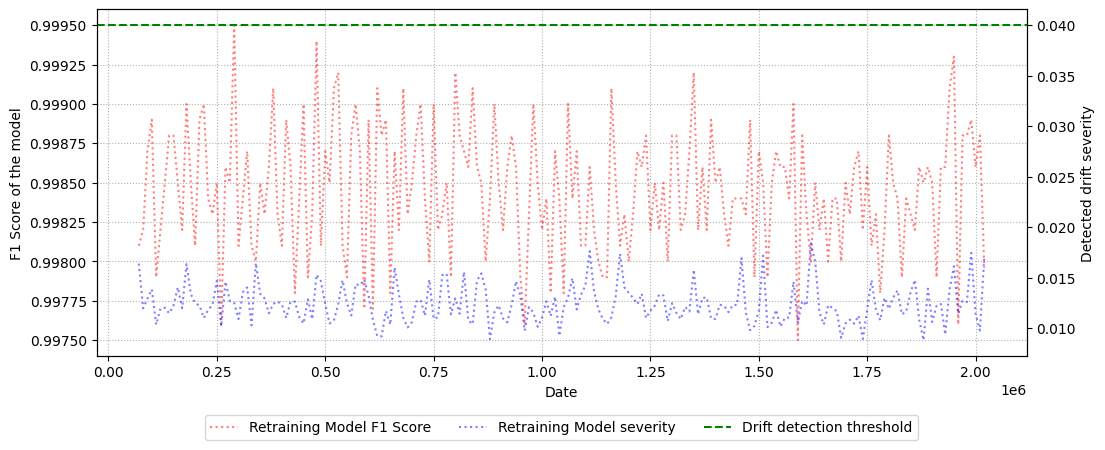

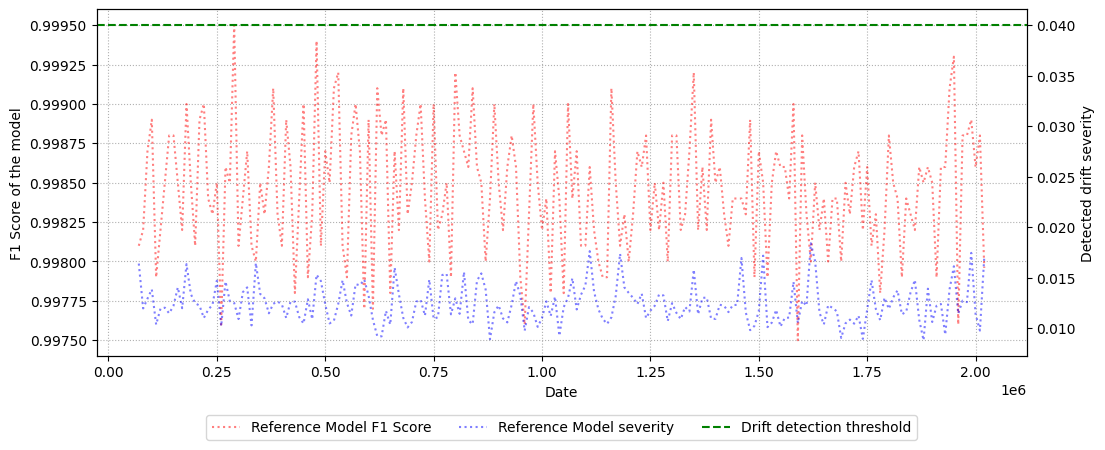

In [3]:
figure = reporter_retrained.plot_global_results(detection_threshold = 0.04,
        severity_style = [{"line": "dotted", "color": "blue", "alpha": 0.5},
                          {"line": "solid", "color": "blue", "alpha": 0.5}],
        f1_style = [{"line": "dotted", "color": "red", "alpha": 0.5},
                    {"line": "solid", "color": "red", "alpha": 0.5}],
        detection_style = [{"line": "solid", "color": "black", "alpha": 0.5},
                           {"line": "dotted", "color": "cyan", "alpha": 0.4}]
    )

figure = reporter_reference.plot_global_results(detection_threshold = 0.04,
        severity_style = [{"line": "dotted", "color": "blue", "alpha": 0.5},
                          {"line": "solid", "color": "blue", "alpha": 0.5}],
        f1_style = [{"line": "dotted", "color": "red", "alpha": 0.5},
                    {"line": "solid", "color": "red", "alpha": 0.5}],
        detection_style = [{"line": "solid", "color": "black", "alpha": 0.5},
                           {"line": "dotted", "color": "cyan", "alpha": 0.4}]
    )

### Chunk by chunk analysis
One may split the results into chunks (for example weeks) to quickly discover interesting parts of the data to further study

In [4]:
for r in reporter_retrained.get_chunk_results(sort_by="Mean_drift_strength", ascending = False):
    display(r)

for r in reporter_reference.get_chunk_results(sort_by="Mean_drift_strength", ascending = False):
    display(r)

,Ratio_of_drift_detections,Mean_drift_strength,Mean_ratio_of_drifted_features,Mean_f1_score
Chunk,,,,
14,0.0,0.013882,0.0,0.998385
22,0.0,0.013363,0.0,0.998257
10,0.0,0.013261,0.0,0.998571
27,0.0,0.013210,0.0,0.998494
1,0.0,0.013142,0.0,0.998557
3,0.0,0.012930,0.0,0.998471
0,0.0,0.012793,0.0,0.998357
16,0.0,0.012737,0.0,0.998414
19,0.0,0.012671,0.0,0.998386


,Ratio_of_drift_detections,Mean_drift_strength,Mean_ratio_of_drifted_features,Mean_f1_score
Chunk,,,,
14,0.0,0.013882,0.0,0.998385
22,0.0,0.013363,0.0,0.998257
10,0.0,0.013261,0.0,0.998571
27,0.0,0.013210,0.0,0.998494
1,0.0,0.013142,0.0,0.998557
3,0.0,0.012930,0.0,0.998471
0,0.0,0.012793,0.0,0.998357
16,0.0,0.012737,0.0,0.998414
19,0.0,0.012671,0.0,0.998386


### Per class analysis
Analyse different classes and find potentially problematic ones. Automatic plotting of the most drifted classes can be done, or various manual plotting functions can be used to further examine interesting behaviour

* Here, we can look at the most drifted classes, then analyse the most correlated ones or examine the model retraining effects on the most drifted class

Most drifted classes:

Experiment Retraining Model
0    0.735402
1    0.803584
dtype: float64

 Compare F1 scores between experiments:


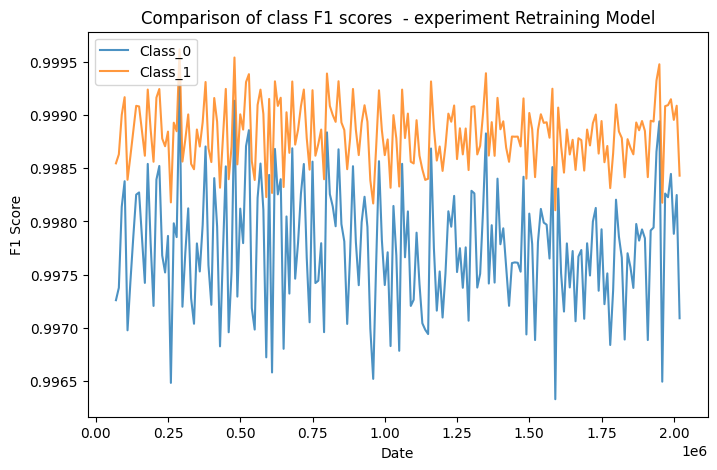

Compare drifts between experiments:


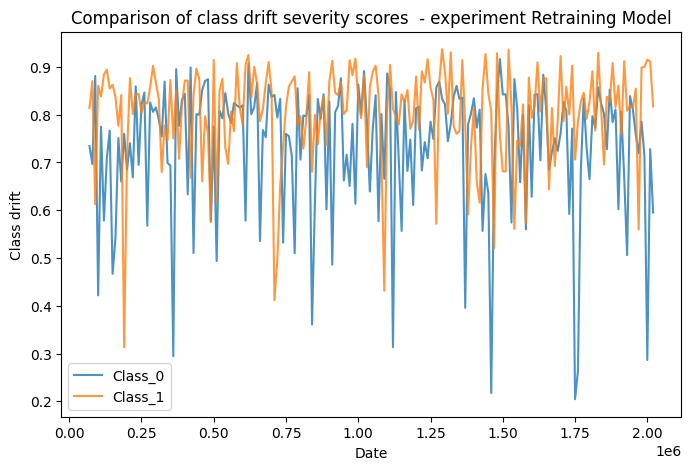

Class pairs with most correlated F1 scores
0  1    0.995716
dtype: float64

Class pairs with most correlated drifts
0  1    0.020528
dtype: float64
Most drifted classes:

Experiment Reference Model
0    0.735402
1    0.803584
dtype: float64

 Compare F1 scores between experiments:


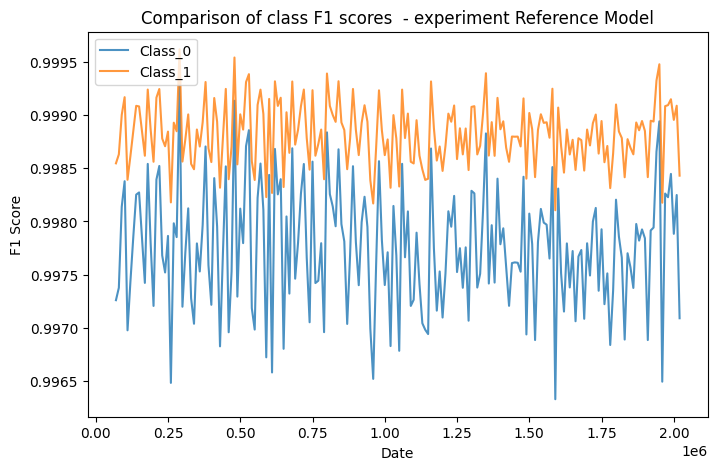

Compare drifts between experiments:


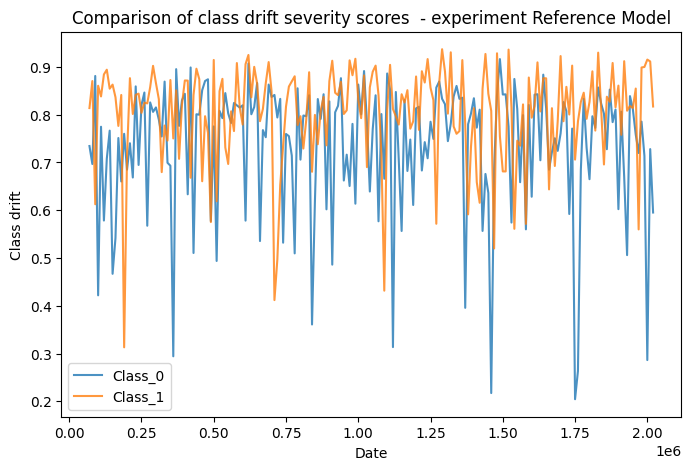

Class pairs with most correlated F1 scores
0  1    0.995716
dtype: float64

Class pairs with most correlated drifts
0  1    0.020528
dtype: float64


In [5]:
reporter_retrained.analyse_class_drift(5)

reporter_reference.analyse_class_drift(5)

In [16]:
#Example of multifeature support
#reporter_ref.plot_class("class_f1",[56,59,55])
#reporter_ref.plot_class("class_drift",[39,72])
#reporter_ref.plot_class_comparison([9,10])

### Per feature analysis
Analyse different features and find potentially problematic ones. 

Most drifted features:

Experiment Retraining Model
IPT_20    0.015588
IPT_7     0.015204
IPT_6     0.015117
IPT_5     0.014336
IPT_23    0.014081
dtype: float64

 Compare drifts between experiments:


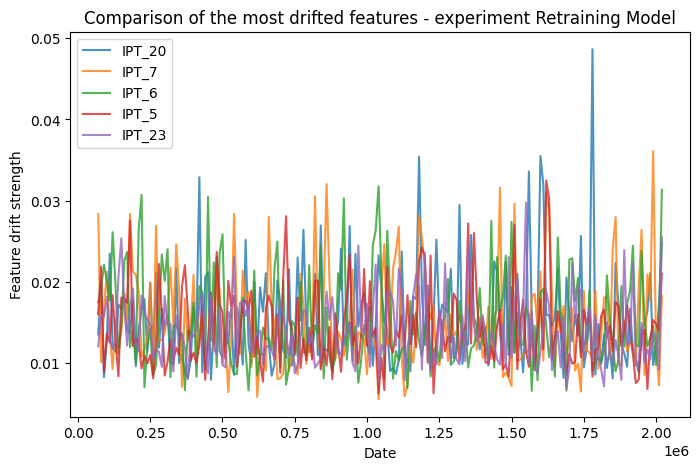

Most drifted features:

Experiment Reference Model
IPT_20    0.015588
IPT_7     0.015204
IPT_6     0.015117
IPT_5     0.014336
IPT_23    0.014081
dtype: float64

 Compare drifts between experiments:


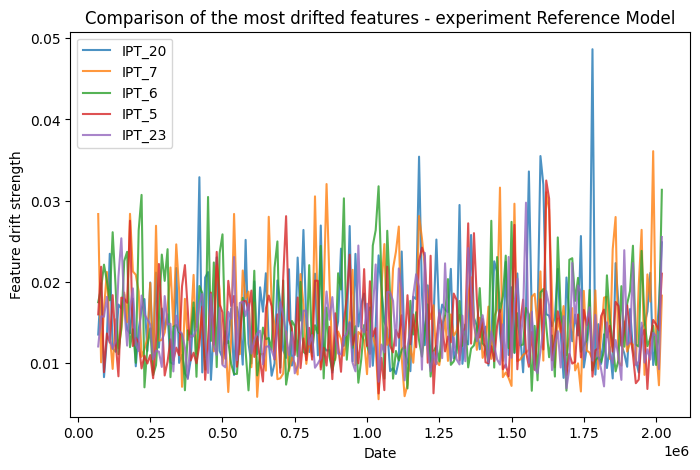

In [6]:
reporter_retrained.analyse_feature_drift(5)

reporter_reference.analyse_feature_drift(5)

In [66]:
#reporter.plot_feature_comparison("SIZE_4")

In [22]:
#Example of multifeature support
#reporter.plot_feature(["SIZE_5","DIR_3"])

# Detailed logs

In [8]:
detailed_logs_retrained = logger_retrained[0].get_logs()

detailed_logs_reference = logger_reference[0].get_logs()

In [19]:
#display(detailed_logs["description"])
#display(detailed_logs["overview"])
#display(detailed_logs["test_info"])
#detailed_logs["global_drift"]
#detailed_logs["class_drift"]
#detailed_logs["class_shares"]
#detailed_logs["class_f1"]
#detailed_logs["feature_drift"]

In [9]:
detailed_logs_retrained["global_drift"][detailed_logs_retrained["global_drift"]["is_drifted"] == True ]

,is_drifted,drift_strength,share_drifted_features,f1


In [10]:
detailed_logs_reference["global_drift"][detailed_logs_reference["global_drift"]["is_drifted"] == True ]

,is_drifted,drift_strength,share_drifted_features,f1
